In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.io

In [3]:
G_path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/'G_Ready-Set_bin1ms_alignedReady.mat'
H_path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/'H_Ready-Set_bin1ms_alignedReady.mat'
path = G_path
# data = scipy.io.loadmat(path)

`scipy.io.loadmat` fails with this type of file

## trying h5py

In [3]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [4]:
import h5py
# with h5py.File(path, 'r') as f:
#     print(f.keys())
f = h5py.File(path, 'r')
print(f.keys())

<KeysViewHDF5 ['#refs#', 'D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin']>


In [5]:
refs = f['#refs#']
refs

<HDF5 group "/#refs#" (850 members)>

The data inside each file is organized as follows:

\- D [1xS cells] is the spiking data, where S is the number of sessions. Each cell contains data from a given session in the form of a 3-D tensor [TxNxK] where T is the number of time points within a trial (sampled at 1-ms resolution), N is the number of neurons, and K is the number of trials. The entries of the tensor are 0 (no spike), or 1 (spike). Note that the data has been NaN-padded to accommodate trials of different durations. The data provided is between the Ready and the Set cues.

\- t_s [1xS cells] is the sample interval presented to the animal on every trial (duration of the Ready-Set epoch).

\- t_p [1xS cells] is the interval produced by the animal on every trial (duration of the Set-Go epoch).

\- id_eye [1xS cells] is an indicator of whether the monkey used the eye (1) or the hand (0) to respond at Go.

\- id_left [1xS cells] is an indicator of whether the target was located to the left (1) or right (0) to  fixation point.

\- id_short [1xS cells] is an indicator of whether the color cue was red (1) or blue (0) respectively corresponding to the Short and Long distribution.

\- id_trial [1xS cells] is the trial number within each session. Some trials were excluded offline due to the animal not responding or breaking fixation early.

\- id_neuron [1xS cells] is the neuron identity for each session in the form of a matrix [Nx2] where N is the number of neurons. The first column is the neuron label, the second column indicates 1 for putative single units and 0 for multi units.

\- wbin is the size of the bin (in ms) used to discretize the data

\- sp_times [1xS cells] is the spike times for each session in the form of a series of cells [Nx1] where N is the number of neurons, containing the spike times [N_times x 1]. Note here that we include ALL spikes, even those outside of trial periods. 

In [6]:
D = f['D']
D.shape,  D.dtype

((12, 1), dtype('O'))

In [7]:
D[0]

array([<HDF5 object reference>], dtype=object)

In [8]:
%pip install mat73

Note: you may need to restart the kernel to use updated packages.


## trying mat73

In [4]:
import mat73
mat73data_dict = mat73.loadmat(path)

In [10]:
dt = mat73data_dict['wbin']
dt

array(1.)

In [11]:
mat73data_dict.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin'])

In [12]:
N_session = len(mat73data_dict['D'])
print('number of sessions =', N_session)

number of sessions = 12


In [13]:
i_session = 0
N_time, N_neurons, N_trial = mat73data_dict['D'][i_session].shape
N_time, N_neurons, N_trial

(1200, 107, 1498)

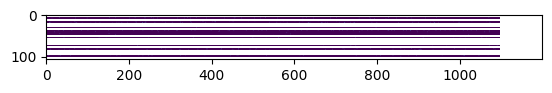

In [14]:
i_trial = 0
plt.imshow(mat73data_dict['D'][i_session][:, :, 0].T)

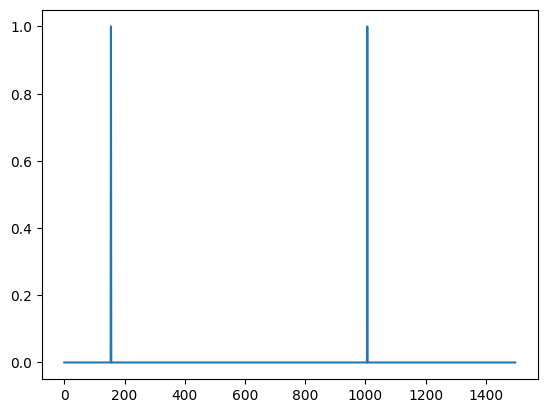

In [15]:
plt.plot(mat73data_dict['D'][i_session][200, 0, :])

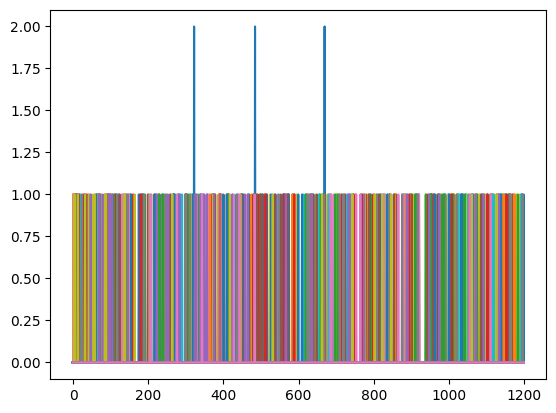

In [16]:
plt.plot(mat73data_dict['D'][i_session][:, :, 1]);

In [17]:
for i_session in range(N_session):
    print(i_session, np.nanmax(mat73data_dict['D'][i_session]))

0 19.0
1 3.0
2 3.0
3 3.0
4 5.0
5 2.0
6 4.0
7 3.0
8 4.0
9 3.0
10 3.0
11 3.0


In [18]:
i_session = 0
data = mat73data_dict['D'][i_session]
data.shape, np.nanargmax(data), np.unravel_index(np.nanargmax(data), data.shape)

((1200, 107, 1498), 135445891, (845, 2, 1225))

In [19]:
# time 845, neuron 2, trial 1225 has 19 spikes!
data[845, 2, 1225]

19.0

0 19.0 [4.37494342e-03 8.64719835e-06 8.04390544e-08 3.21756218e-08
 2.41317163e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.04390544e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.04390544e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.04390544e-09]
1 3.0 [5.87119761e-03 1.05491290e-05]
2 3.0 [4.53650317e-03 1.97651575e-06]
3 3.0 [2.30410820e-03 9.60145097e-07]
4 5.0 [5.98696053e-03 6.65220552e-06 1.95509347e-08 4.88773367e-09]
5 2.0 [0.00150635]
6 4.0 [6.00846089e-03 1.72957082e-05 1.13538566e-07]
7 3.0 [1.05316617e-02 4.52644212e-05]
8 4.0 [5.48487599e-03 2.14166002e-06 4.98060470e-08]
9 3.0 [5.94812540e-03 5.53133105e-06]
10 3.0 [7.39581757e-03 5.88291398e-06]
11 3.0 [6.38379215e-03 6.60865707e-06]


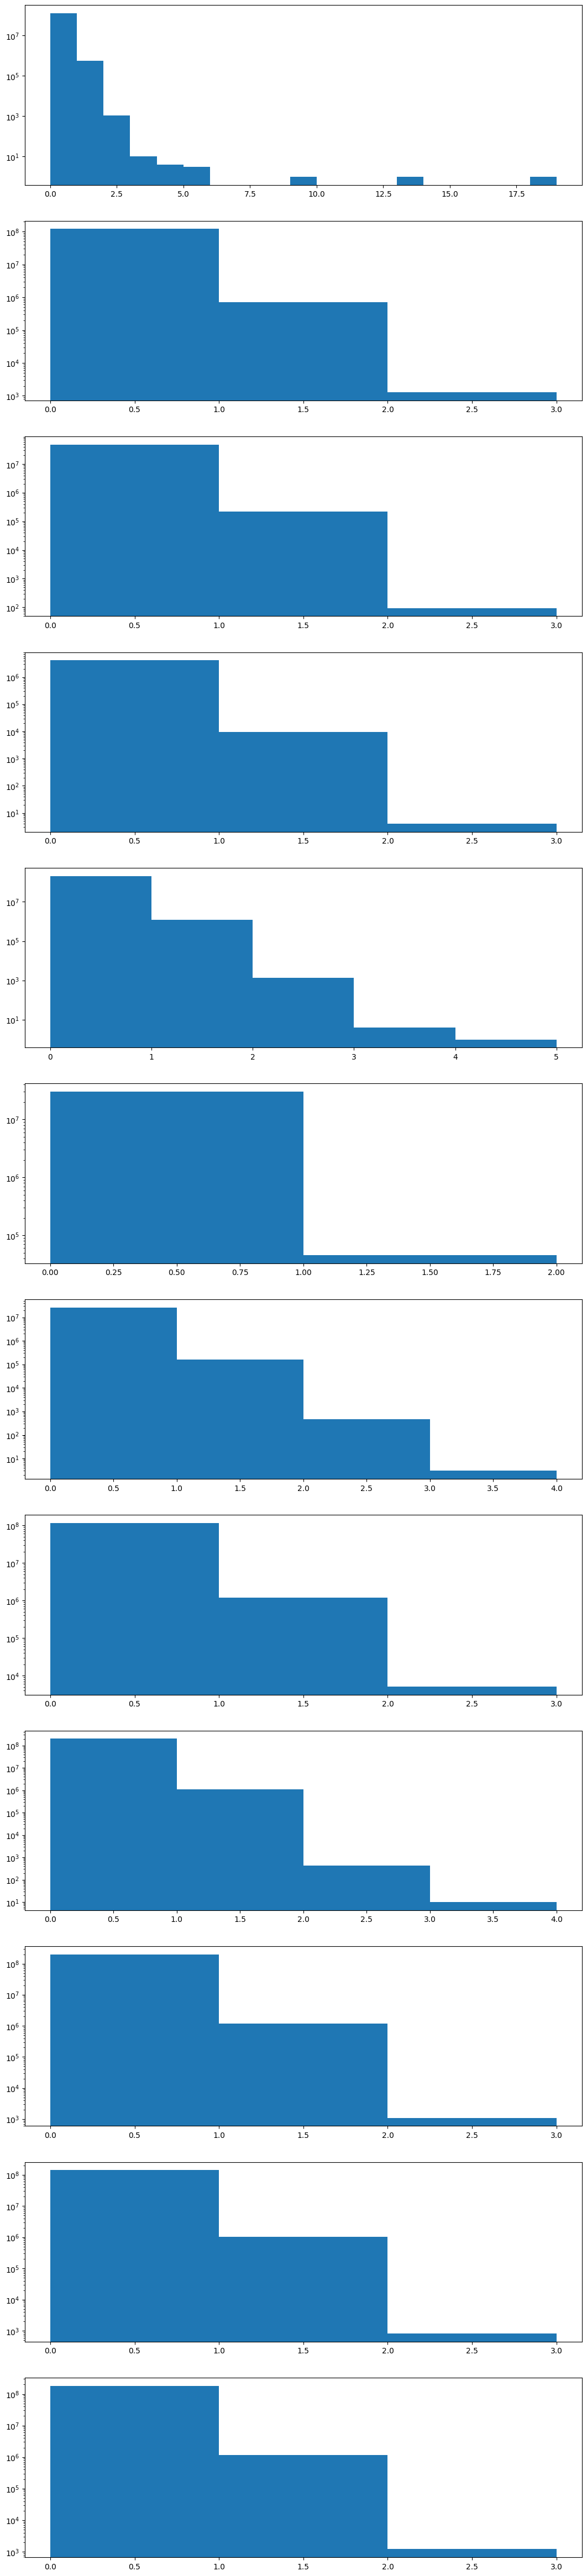

In [34]:
fig, axs = plt.subplots(N_session, 1, figsize=(13, 5*N_session))
for i_session, ax in enumerate(axs):
    data = mat73data_dict['D'][i_session]
    counts, bins, bar = ax.hist(data.ravel(), bins=int(np.nanmax(data)))
    ax.set_yscale('log')
    print(i_session, int(np.nanmax(data)), counts[1:]/counts[0])


In [39]:
# \- id_neuron [1xS cells] is the neuron identity for each session in the form of a matrix [Nx2] where N is the number of neurons. The first column is the neuron label, the second column indicates 1 for putative single units and 0 for multi units.
for i_session in range(N_session):
    id_neuron = mat73data_dict['id_neuron'][i_session]
    print(i_session, '# of neurons', id_neuron.shape[0], 'single units', np.sum(id_neuron[:, 1]==1), 'multi units', np.sum(id_neuron[:, 1]==0))

0 # of neurons 107 single units 59 multi units 48
1 # of neurons 97 single units 44 multi units 53
2 # of neurons 41 single units 8 multi units 33
3 # of neurons 3 single units 0 multi units 3
4 # of neurons 105 single units 29 multi units 76
5 # of neurons 20 single units 1 multi units 19
6 # of neurons 31 single units 9 multi units 22
7 # of neurons 45 single units 10 multi units 35
8 # of neurons 76 single units 22 multi units 54
9 # of neurons 81 single units 29 multi units 52
10 # of neurons 52 single units 16 multi units 36
11 # of neurons 83 single units 33 multi units 50


(1200, 107, 1498) (1200, 59, 1498)
0 19 [4.57328896e-03 3.16858442e-06 7.40323462e-08 0.00000000e+00
 2.96129385e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.48064692e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.48064692e-08]
(1200, 97, 1907) (1200, 44, 1907)
1 2 [0.00503295]
(1200, 41, 1700) (1200, 8, 1700)
2 2 [0.00887429]
(1200, 105, 3115) (1200, 29, 3115)
4 5 [5.27024855e-03 1.99868763e-06 0.00000000e+00 3.63397750e-08]
(1200, 20, 2356) (1200, 1, 2356)
5 1 []
(1200, 31, 1769) (1200, 9, 1769)
6 1 []
(1200, 45, 3591) (1200, 10, 3591)
7 2 [0.00820086]
(1200, 76, 4061) (1200, 22, 4061)
8 3 [6.71411968e-03 8.54019133e-07]
(1200, 81, 3108) (1200, 29, 3108)
9 2 [0.00628656]
(1200, 52, 4077) (1200, 16, 4077)
10 3 [6.20069995e-03 2.46402351e-06]
(1200, 83, 3411) (1200, 33, 3411)
11 2 [0.00939187]


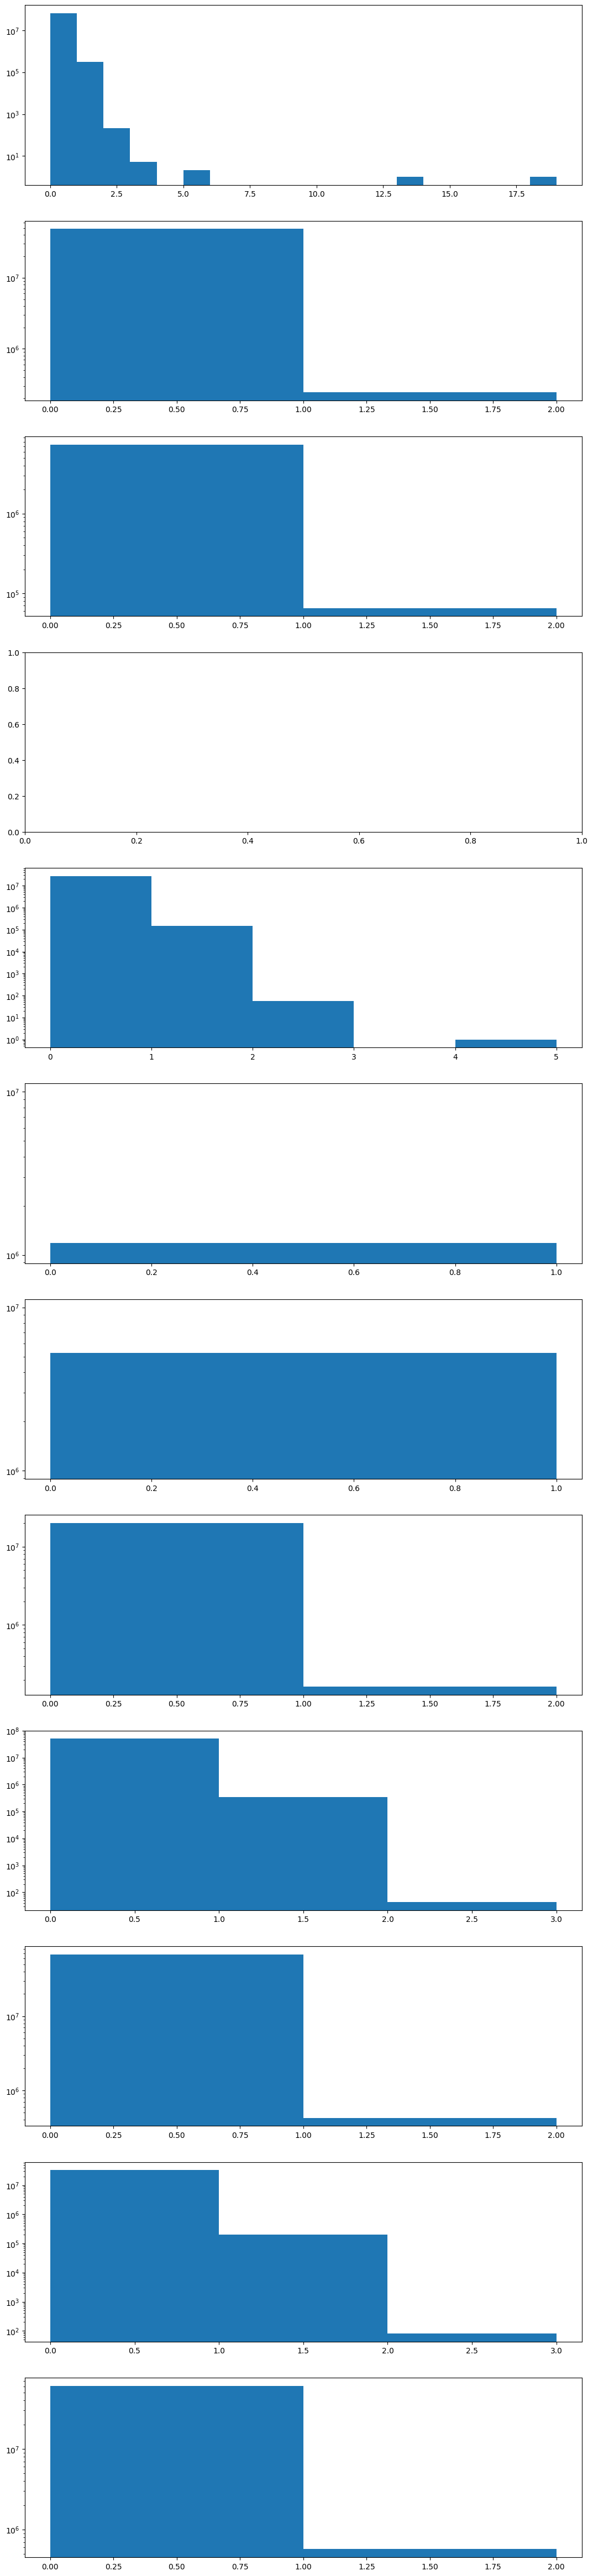

In [43]:
fig, axs = plt.subplots(N_session, 1, figsize=(13, 5*N_session))
for i_session, ax in enumerate(axs):
    data = mat73data_dict['D'][i_session]
    id_neuron = mat73data_dict['id_neuron'][i_session]
    if sum(id_neuron[:, 1]==1)>0:
        data_SU = data[:, id_neuron[:, 1]==1, :]
        print(data.shape, data_SU.shape)
        counts, bins, bar = ax.hist(data_SU.ravel(), bins=int(np.nanmax(data_SU)))
        ax.set_yscale('log')
        print(i_session, int(np.nanmax(data_SU)), counts[1:]/counts[0])


In [42]:
id_neuron[:, 1]==1

array([False, False, False])

## displaying some raster plots

In [44]:
data.shape

(1200, 83, 3411)

In [48]:
for i_session in range(N_session):
    data = mat73data_dict['D'][i_session]
    # print(i_session, np.nanmean(data)*1000, np.nanstd(data)*1000, np.nanmean(data, axis=(0, 1)))
    print(i_session, np.mean(np.nanmean(data, axis=(0, 1))*1000), np.std(np.nanmean(data, axis=(0, 1))*1000))

0 4.391640246799251 0.6562914299858119
1 5.8521247891571875 1.231659537307187
2 4.613178259113118 1.5803987622154743
3 2.3162757398621814 1.3623696904607185
4 5.917819795988978 1.3653212048243153
5 1.496611322164459 0.7599168108718695
6 6.072611639998831 1.1558447418496531
7 10.542344320736694 1.9849740508819083
8 5.4747380677194295 0.7260648271102701
9 5.94070840249739 0.6165534025499333
10 7.3426221089845285 1.2683897274950415
11 6.322194344428245 1.215111210980463


In [53]:
ax.axis?

Signature: ax.axis(arg=None, /, *, emit=True, **kwargs)
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ======== ==========================================================
    Value    Description
    ======== ==========================================================
    'on'     Turn on axis lines and labels. Same as ``True``.
    'off'    Turn off axis lines and labels. Same as ``False``.
    'equal'  Set equal scaling (i.e., make circles circular) by
             changing axi

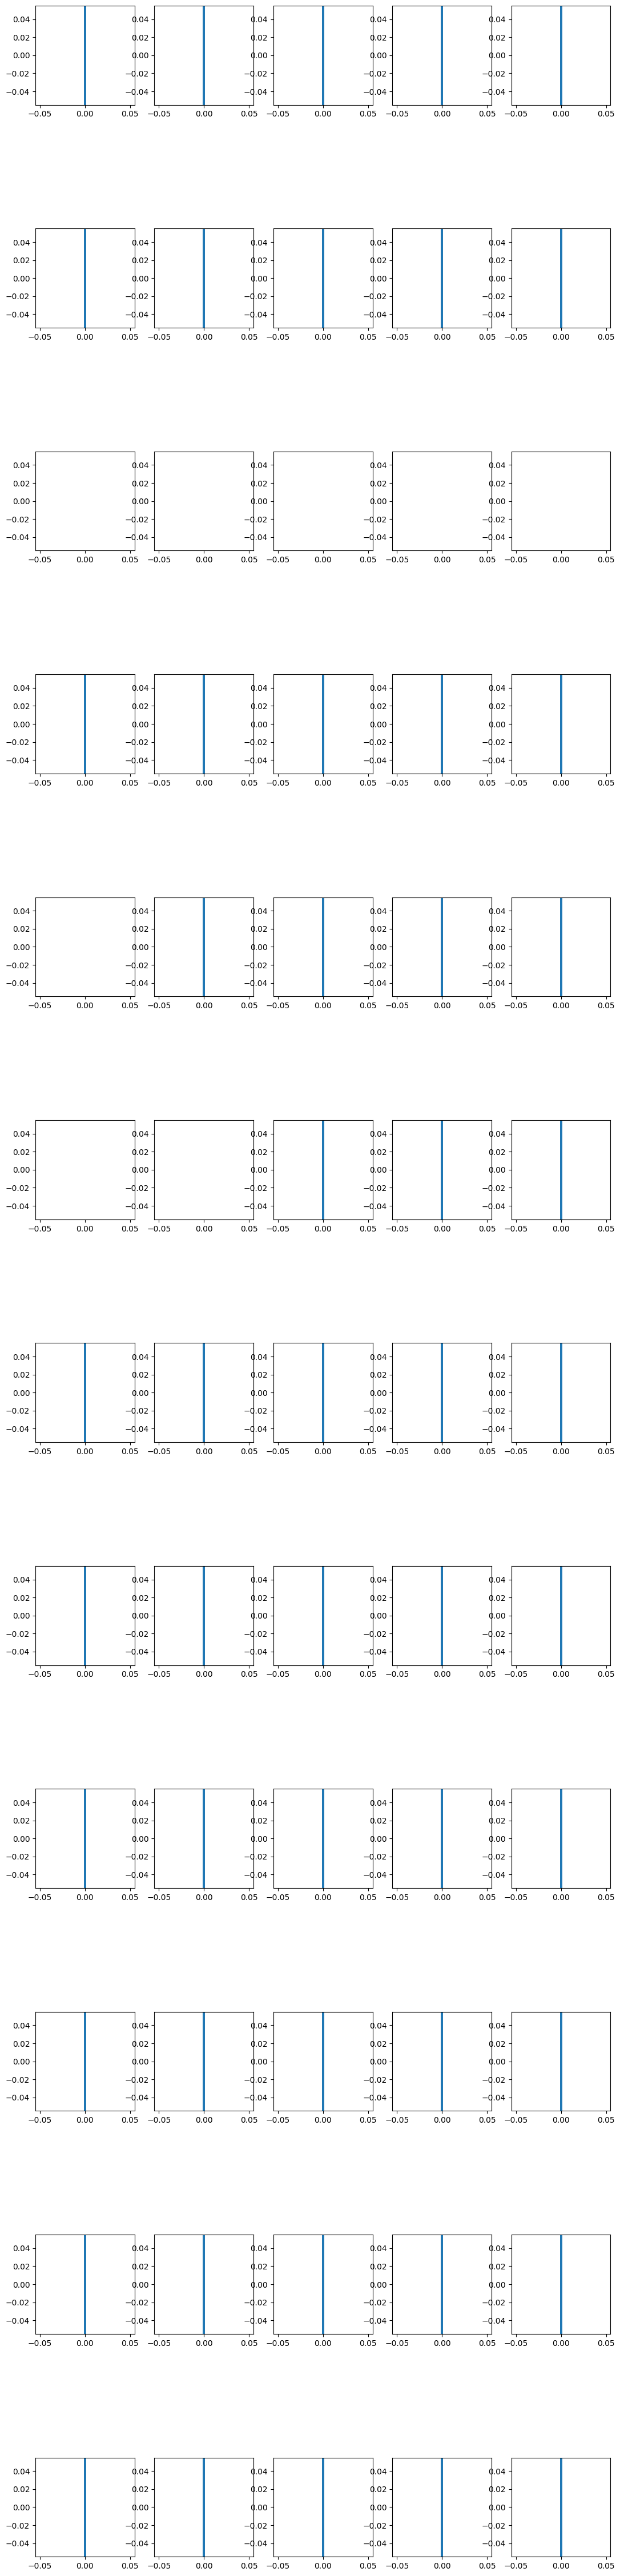

In [56]:
N_trial_show = 5
fig, axs = plt.subplots(N_session, N_trial_show, figsize=(13, 5*N_session))
for i_session, ax_ in enumerate(axs):
    data = mat73data_dict['D'][i_session]
    for i_trial, ax in enumerate(ax_):
        ax.eventplot(data[:, :, i_trial])
        ax.axis('scaled')

In [63]:
data_ = data[:, :, i_trial]
np.nanmean(data_)

0.004488372093023256

In [64]:
data[:2, :, i_trial]

array([[ 0.,  0.,  0., nan,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,
         0., nan,  0., nan, nan, nan, nan, nan,  0., nan,  0., nan, nan,
        nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0., nan, nan, nan,
        nan,  0., nan, nan, nan,  0., nan, nan, nan, nan,  0., nan,  0.,
         0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,  0., nan, nan,
         0., nan, nan, nan, nan],
       [ 0.,  0.,  0., nan,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,
         0., nan,  0., nan, nan, nan, nan, nan,  0., nan,  0., nan, nan,
        nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0., nan, nan, nan,
        nan,  0., nan, nan, nan,  0., nan, nan, nan, nan,  0., nan,  0.,
         0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,  0., nan, nan,
         0., nan, nan, nan, nan]])

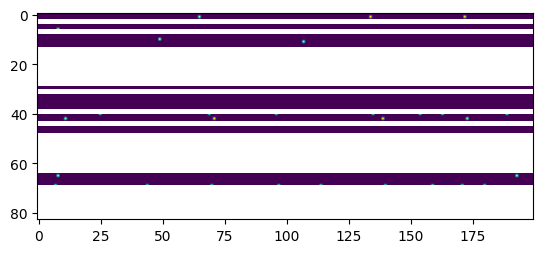

In [62]:
plt.imshow(data[:200, :, i_trial].T)


alternative use Masked Arrays =  https://numpy.org/doc/stable/reference/maskedarray.generic.html ?



In [65]:
import numpy.ma as ma
ma.masked_invalid(data[:2, :, i_trial])

masked_array(
  data=[[0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, --, 0.0, --, --, --, --, --, 0.0, --, 0.0, --, --, --, --,
         --, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0,
         0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, --, --, --, --, 0.0, --,
         --, --, 0.0, --, --, --, --, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, --, --, --, --, --, 0.0, --, --, 0.0, --, --, --, --],
        [0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, --, 0.0, --, --, --, --, --, 0.0, --, 0.0, --, --, --, --,
         --, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, --, 0.0,
         0.0, 0.0, 0.0, --, 0.0, 0.0, 0.0, 0.0, --, --, --, --, 0.0, --,
         --, --, 0.0, --, --, --, --, 0.0, --, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, --, --, --, --, --, 0.0, --, --, 0.0, --, --, --, --]],
  mask=[[False, False, False,  True, False, False, False,  True, False,
         False, False, False, False, False,  True, Fa

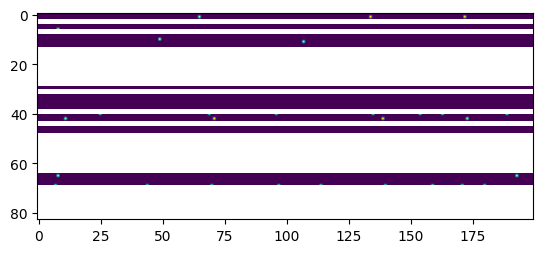

In [67]:
plt.imshow(ma.masked_invalid(data[:200, :, i_trial]).T)


In [103]:
i_session = 0
N_time, N_neurons, N_trial = mat73data_dict['D'][i_session].shape
data = mat73data_dict['D'][i_session]
N_time, N_neurons, N_trial

(1200, 107, 1498)

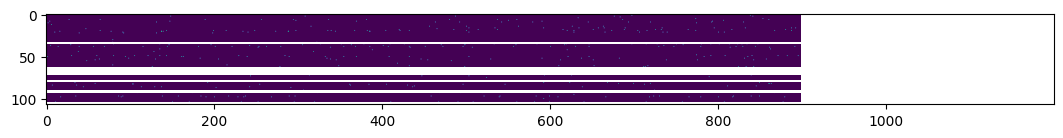

In [104]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(ma.masked_invalid(data[:, :, i_trial]).T)

In [105]:
np.mean(data[:, :, i_trial], axis=0)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

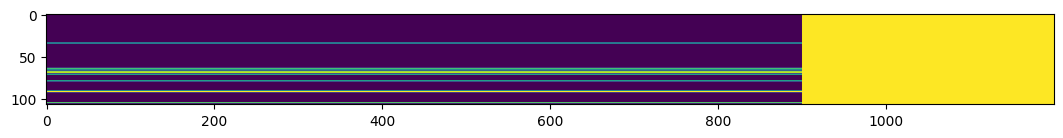

In [106]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(np.isnan(data[:, :, i_trial]).T)

In [107]:
N_neurons

107

array([ 10,  10,  10, ..., 107, 107, 107])

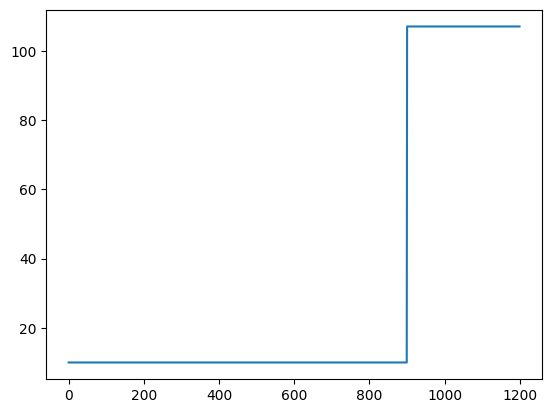

In [108]:
plt.plot(np.isnan(data[:, :, i_trial]).sum(axis=1))
np.isnan(data[:, :, i_trial]).sum(axis=1)

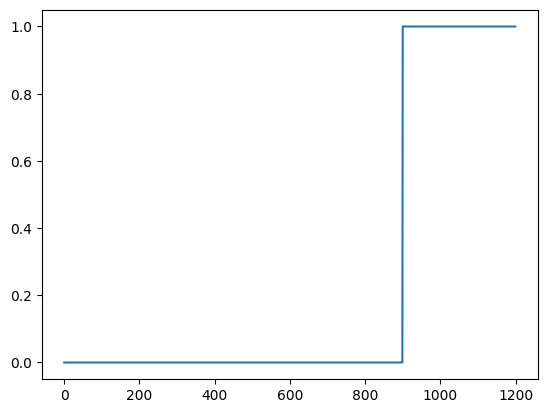

In [109]:
# trim time
plt.plot(np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons)

In [120]:
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons, :, i_trial]
data_trimT.shape

(900, 107)

In [122]:
data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

(900, 97)

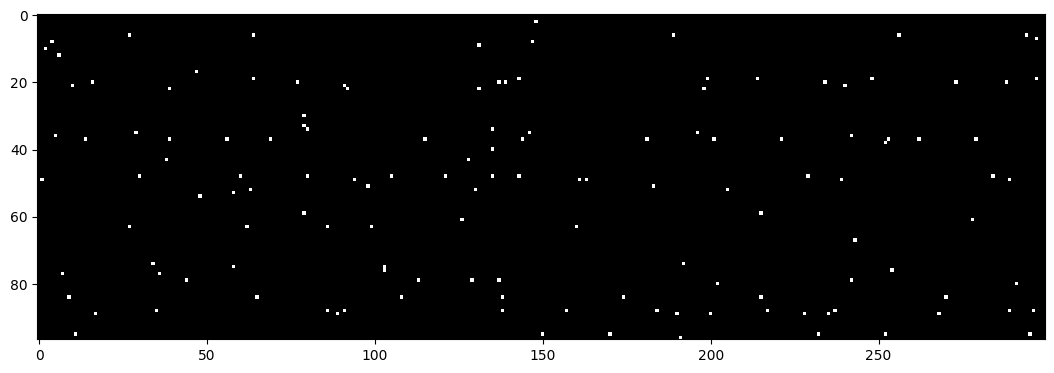

In [133]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray')